In [66]:
using LinearAlgebra
using DSP
using Statistics
using PyPlot

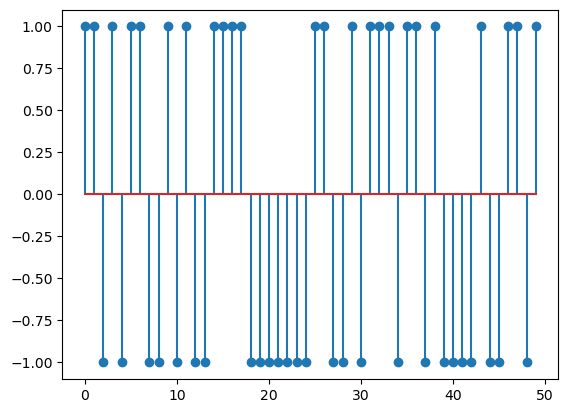

(PyObject <matplotlib.lines.Line2D object at 0x000000007FF76D30>, PyObject <matplotlib.collections.LineCollection object at 0x000000007FF68EE0>, PyObject <matplotlib.lines.Line2D object at 0x000000007FF90100>)

In [67]:
#7.15 (B)

u = rand([-1,1],50)
c = [1, 0.7, -0.3]
h = [0.9, -0.5, 0.5, -0.4, 0.3, -0.3, 0.2, -0.1]

y = conv(c,u)
z = conv(h, y)

stem(u)

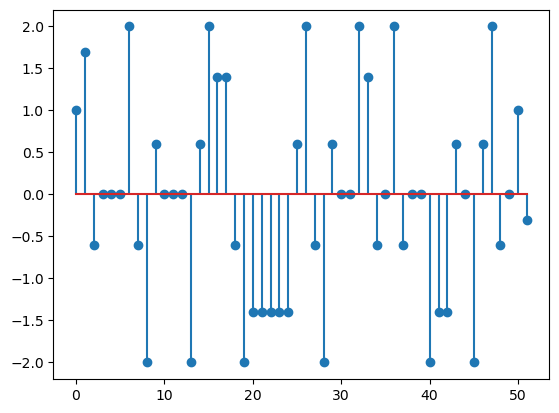

(PyObject <matplotlib.lines.Line2D object at 0x00000000865F0EB0>, PyObject <matplotlib.collections.LineCollection object at 0x00000000865F0040>, PyObject <matplotlib.lines.Line2D object at 0x0000000086609280>)

In [68]:
stem(y)

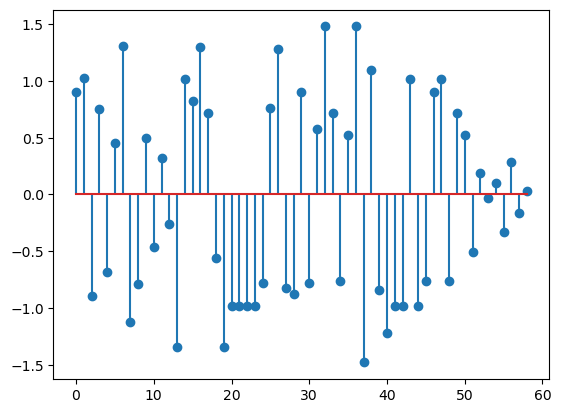

(PyObject <matplotlib.lines.Line2D object at 0x0000000086697100>, PyObject <matplotlib.collections.LineCollection object at 0x0000000086678100>, PyObject <matplotlib.lines.Line2D object at 0x0000000086697490>)

In [69]:
stem(z)

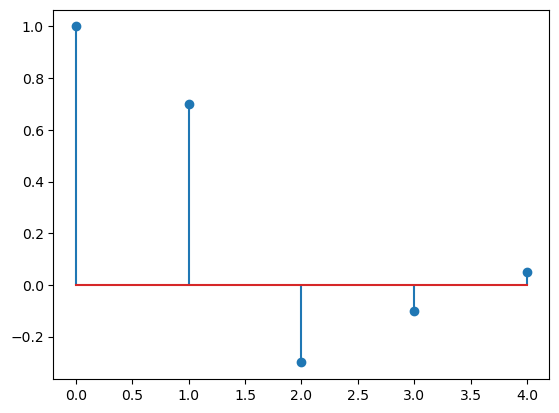

(PyObject <matplotlib.lines.Line2D object at 0x00000000867792E0>, PyObject <matplotlib.collections.LineCollection object at 0x0000000086769D00>, PyObject <matplotlib.lines.Line2D object at 0x0000000086779670>)

In [70]:
#A7.1
# (A)

include("channel_equalization_data.jl")
stem(c)

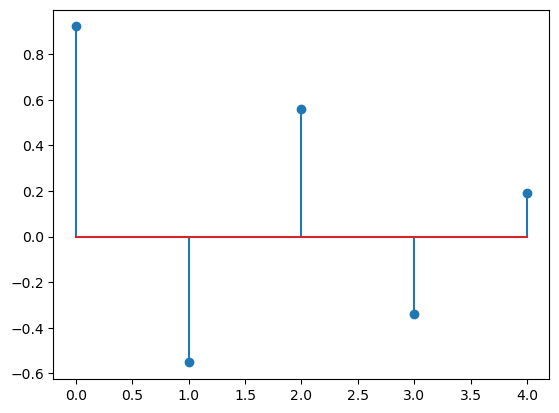

(PyObject <matplotlib.lines.Line2D object at 0x00000000867B40A0>, PyObject <matplotlib.collections.LineCollection object at 0x00000000867A2AC0>, PyObject <matplotlib.lines.Line2D object at 0x00000000867B4430>)

In [71]:
stem(h)

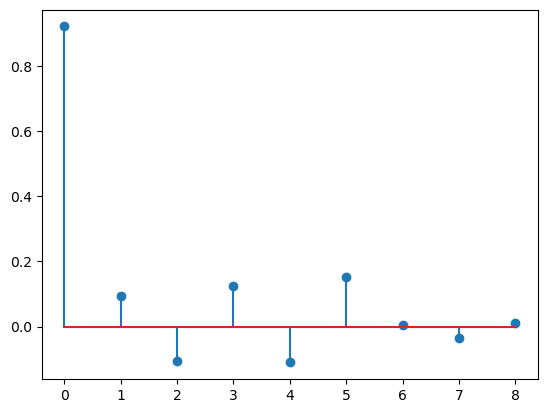

(PyObject <matplotlib.lines.Line2D object at 0x0000000085E228E0>, PyObject <matplotlib.collections.LineCollection object at 0x0000000085E22280>, PyObject <matplotlib.lines.Line2D object at 0x0000000085E22C70>)

In [77]:
stem(conv(c,h))

#Observation
# Here we can see that the c*h vector is approx. equal to e1 as all the values after the first are close to 0
# the equalizer, when convoluted with the channel impulse response, 
# approximately gives the original signal when used for equalizing

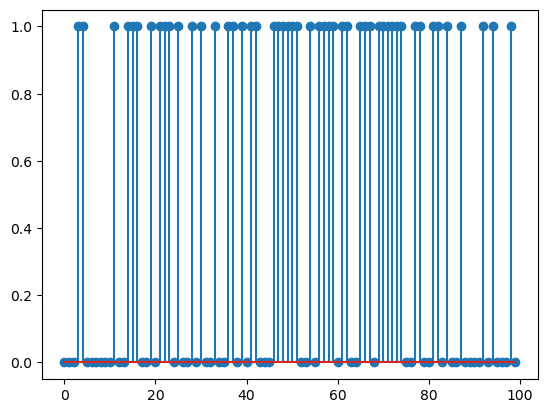

(PyObject <matplotlib.lines.Line2D object at 0x00000000868C38E0>, PyObject <matplotlib.collections.LineCollection object at 0x000000008689C130>, PyObject <matplotlib.lines.Line2D object at 0x00000000868C3C70>)

In [73]:
# (B)

stem(s[1:100])

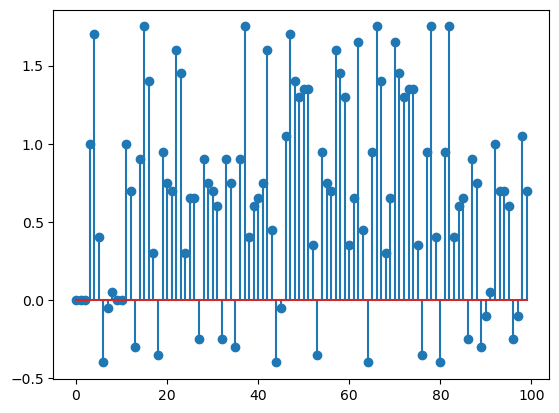

(PyObject <matplotlib.lines.Line2D object at 0x00000000869A0130>, PyObject <matplotlib.collections.LineCollection object at 0x0000000086969940>, PyObject <matplotlib.lines.Line2D object at 0x00000000869A04C0>)

In [74]:
y = conv(c, s)
scap = y .> 0.5 
stem(y[1:100])

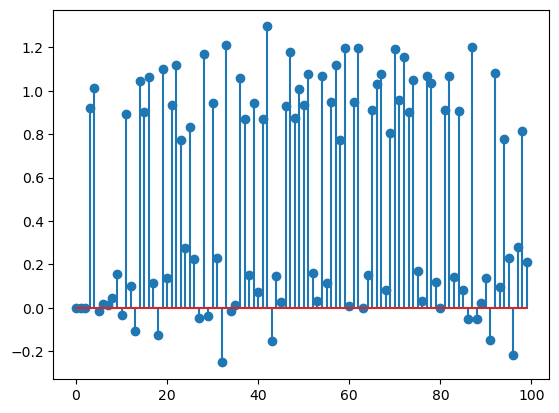

(PyObject <matplotlib.lines.Line2D object at 0x0000000089082370>, PyObject <matplotlib.collections.LineCollection object at 0x00000000891CAB80>, PyObject <matplotlib.lines.Line2D object at 0x0000000089082700>)

In [75]:
ycap = conv(h, y)
stem(ycap[1:100])

In [ ]:
# Just from these plots (even without rounding), this can already be seen that the ber of scap would be worse when compared
# to s as we can see that many values are quite close to 0.5 in case of s and upon rounding would lead to error in case of the 
# output

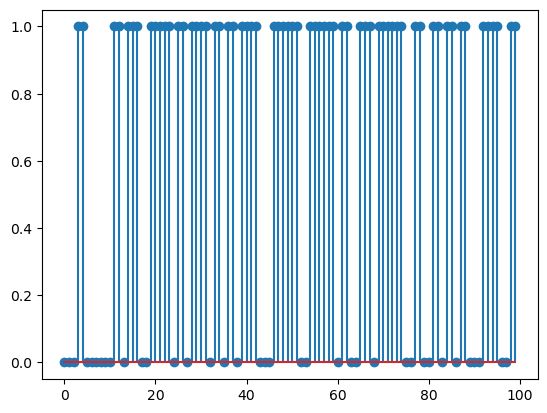

(PyObject <matplotlib.lines.Line2D object at 0x000000000DA9CBB0>, PyObject <matplotlib.collections.LineCollection object at 0x000000000DA78400>, PyObject <matplotlib.lines.Line2D object at 0x000000000DA9CF40>)

In [94]:
scapeq = ycap .> 0.5
scap = y .> 0.5

stem(scap[1:100])

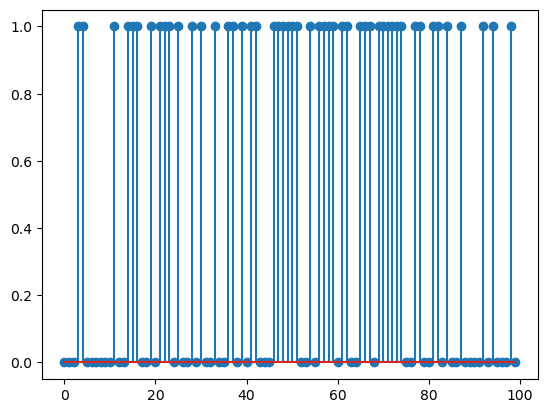

(PyObject <matplotlib.lines.Line2D object at 0x000000000DB3C400>, PyObject <matplotlib.collections.LineCollection object at 0x000000000DB07C10>, PyObject <matplotlib.lines.Line2D object at 0x000000000DB3C790>)

In [95]:
stem(scapeq[1:100])

In [92]:

#BER in case of scap
println(sum(abs.(scap[1:1000] - s)))

#BER in case of scapeq
println(sum(abs.(scapeq[1:1000] - s)))

# here we can see that by adding the equalizer, the BER has been reduced from 115 to 0

115
0


In [109]:
# A7.3

using WAV
x, f = wavread("audio_filtering_original.wav")
x = vec(x)
wavplay(x, f)
x


441000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.2860805094242096
 0.29850155115127563
 0.299630731344223
 0.28992584347724915
 0.2713095545768738
 0.24967192113399506
 0.23129978775978088
 0.21637623012065887
 0.20450453460216522
 0.19547104835510254
 0.18588824570178986
 0.17609180510044098

In [110]:
h_smooth = 1 / 44 * ones(44)
output = conv(h_smooth, x)
wavplay(output, f)

# Applying the h_smooth filter seems to reduce the detail of the audio and reduce the higher frequencies while almost no change
# to the lower frequencies amking the output much more "smooth"

In [108]:
k = length(x)/40
h_echo = 1/2 * ones(floor(Int,k))
op = conv(h_echo, x)
wavplay(op, f)

op2 = conv(h_echo, op)
wavplay(op2, f)